In [116]:
def clean_image(img):
    H,W,_ = img.shape
    img = img[:W,...]
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = img[W//4:W//4+W//2,W//4:W//4+W//2]
    return img
# def center_crop(img_path):
#     img = clean_image(plt.imread(img_path))
#     H,W = img.shape
#     mask = np.zeros((H,W), np.uint8)
#     mask = cv2.circle(mask, (H//2,W//2), H//4, (255,255,255),thickness=-1)
#     masked_data = cv2.bitwise_and(img, img, mask=mask)
#     masked_data = masked_data[H//4:H//4+H//2,H//4:H//4+H//2]
#     return masked_data
# root = 'centered_imgs/'
# !mkdir centered_imgs centered_imgs/Normal/ centered_imgs/Myopia/ 
# for img_p in img_path:
#     img = center_crop(img_p)
    
#     cv2.imwrite(root+img_p.split('/')[1]+"/"+img_p.split('/')[2],img)
# !zip -r centered.zip centered_imgs/ 

In [117]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import glob
import cv2
from albumentations import Rotate
from scipy import ndimage

In [125]:
# img_path = sorted(glob.glob('centered_imgs/*/*'))
img_path = sorted(glob.glob('FAZ_Tortuosity/*/*'))

In [126]:
# _, axs = plt.subplots(3, 3, figsize=(20, 20))
# axs = axs.flatten()
# for i, ax in enumerate(axs):
#     if i%2==0:
#         img = plt.imread(img_path[i],)
#     else:
#         img = plt.imread(img_path[-i],)
# #     img = cv2.fastNlMeansDenoising(img,None,39,7,21)
# #     img = clean_image(img)
#     if i%2==0:
#         img = cv2.fastNlMeansDenoising(img,None,39,7,21)
#         ax.imshow(img,cmap='gray')
#     else:
#         ax.imshow(img,cmap = 'gray')
    
# plt.show()

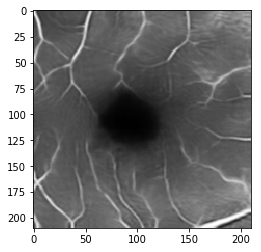

In [127]:
img = clean_image(plt.imread(img_path[0]))
img = cv2.fastNlMeansDenoising(img,None,39,7,21)
plt.imshow(img,cmap='gray')
plt.show()

/home/arnav0400/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: Previously, hessian implicitly used 'constant' as the border mode when dealing with the edge of the array. The new behavior is 'reflect'. To recover the old behavior, use mode='constant'. To avoid this warning, please explicitly set the mode.
  # This is added back by InteractiveShellApp.init_path()


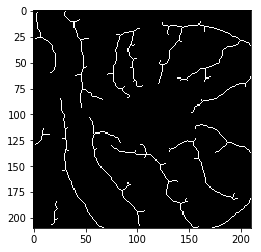

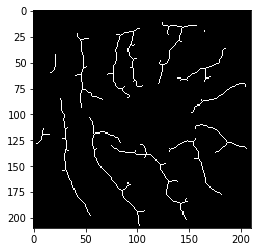

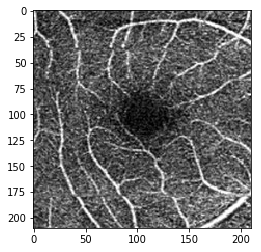

In [166]:
import imutils
from skimage import data
from skimage import color
from skimage.filters import meijering, sato, frangi, hessian
from skimage.morphology import skeletonize, remove_small_objects
from skimage.morphology import medial_axis, skeletonize, thin

img_orig = clean_image(plt.imread(img_path[102]))

img_denoise = cv2.fastNlMeansDenoising(img_orig,None,39,7,21)
image = (hessian(img_orig,)*255).astype('uint8')

img =  cv2.dilate(img,kernel,iterations = 1)
kernel = np.ones((2,2),np.uint8)

image = remove_small_objects(image.astype(bool), min_size=64, connectivity=0).astype(float)
image = cv2.dilate(image,kernel,iterations = 3)
image = cv2.erode(image,kernel,iterations = 3)
image =  cv2.dilate(image,kernel,iterations = 1)
image = cv2.erode(image,kernel,iterations = 1)
image =  cv2.dilate(image,kernel,iterations = 1)

skel = skeletonize(image)
# thin = thin(image)
# med, distance = medial_axis(image, return_distance=True)
# # image = skel*distance

mask = np.zeros_like(image, np.uint8)
H,W = image.shape
mask = cv2.circle(mask, (H//2,W//2), H//2, (255,255,255),thickness=-1)
masked_data = cv2.bitwise_and(skel*255, skel*255, mask=mask)

# print(distance.max(),distance.min())

plt.imshow(skel,cmap ='gray')
plt.show()
plt.imshow(masked_data,cmap ='gray')
plt.show()
plt.imshow(img_orig,cmap ='gray')
plt.show()

In [205]:
image.sum()

16890.0

In [94]:
def thin_haralick(image):
    for i in range(208):
        for j in range(208):
    #         print(i,j)
            if(image[i+1,j+1]==1):
                samp = image[i:i+3,j:j+3]
                b = np.sum(samp)-1

                a_list = [samp[0,1],samp[0,2],samp[1,2],samp[2,2],samp[2,1],samp[2,0],samp[1,0],samp[0,0]]

                a=0
                for k in range(1,len(a_list)):
                    if(a_list[k]==1 and a_list[k-1]==0):
                        a+=1
                if a_list[0]==1 and a_list[-1]==0:
                    a+=1
                    
                case3 = case4 = False
                if(a_list[0]*a_list[2]*a_list[4]==0):
                    case3 = True
                if(a_list[2]*a_list[4]*a_list[6]==0):
                    case4 = True
                
                temp = image.copy()
                temp[i+1,j+1] = 0
                contours1 = cv2.findContours((temp*255).astype('uint8'), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
                contours1 = imutils.grab_contours(contours1)
                contours2 = cv2.findContours((image*255).astype('uint8'), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
                contours2 = imutils.grab_contours(contours2)
                if( 2<=b<=6 and a == 1 and case3 and case4 and len(contours1)==len(contours2)):
                    image[i+1,j+1] = 0

#                 if(a_list[0]*a_list[2]*a_list[6]==0):
#                     case3 = True
#                 if(a_list[0]*a_list[4]*a_list[6]==0):
#                     case4 = True
                    
#                 if( 2<=b<=6 and a == 1 and case3 and case4 and len(contours1)==len(contours2)):
#                     image[i+1,j+1] = 0
    return image

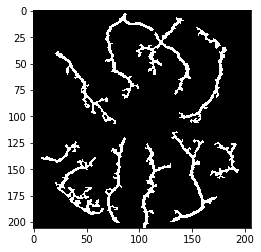

IndexError: index 206 is out of bounds for axis 1 with size 206

In [95]:
plt.imshow(image,cmap ='gray')
plt.show()
plt.imshow(thin_haralick(image), cmap = 'gray')
plt.show()

In [199]:
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt

# im = np.zeros((20, 20))
# im[5:-5, 5:-5] = 1
# im = ndimage.distance_transform_bf(im)
# im_noise = im + 0.2*np.random.randn(*im.shape)

# im_med = ndimage.median_filter(im_noise, 3)

In [13]:
def get_test_transforms():
    list_transforms = []
    list_transforms.extend(
        [
            ToTensor(),
        ]
    )
    list_trfms = Compose(list_transforms)
    return list_trfms

In [ ]:
state = torch.load('./weights/all.pth')
encodings = []
losses = []
def hook(module, input, output):
    encodings.append(output)
for i in tqdm(range(65,len(img_path))):
    model = smp.FPN(ENCODER, encoder_weights='imagenet', classes=1, activation=None,in_channels=1)
    model_trainer = Trainer(model,1e-3,60,img_path[i])
    model_trainer.net.load_state_dict(state['state_dict'])
    model_trainer.optimizer.load_state_dict(state['optimizer'])
    loss = model_trainer.start()
    losses.append(loss)
    
    img = clean_image(plt.imread(img_path[i]))
    img = cv2.resize(img,(256,256))
    aug = get_test_transforms()
    augmented = aug(image=img)
    img = augmented['image']
    img = img[np.newaxis,np.newaxis,...]
    
    encoder_hock = model.encoder.layer4[1].bn2.register_forward_hook(hook)
    out = model(img.cuda())
    encoder_hock.remove()
    print(len(encodings))
    torch.cuda.empty_cache()

In [16]:
encodings = torch.stack(encodings)

In [17]:
encodings = encodings[:,0,...].detach().cpu().numpy()

In [18]:
encodings.shape

(40, 512, 8, 8)

In [19]:
np.save('resnet18-66-104.npy',encodings)